# Titanic EDA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline  

### Read in data

In [20]:
train = pd.read_csv("all/train.csv", header=0)
test = pd.read_csv("all/test.csv", header=0)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

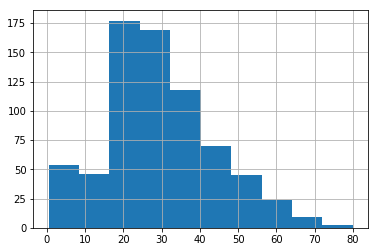

In [19]:
train.Age.hist()

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Merging data together

In [32]:
merged = train.merge(test, on="PassengerId", how="outer")

In [47]:
merged.shape

(1309, 22)

In [34]:
merged.head()

,PassengerId,Survived,Pclass_x,Name_x,Sex_x,Age_x,SibSp_x,Parch_x,Ticket_x,Fare_x,...,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket_y,Fare_y,Cabin_y,Embarked_y
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
merged.describe()

,PassengerId,Survived,Pclass_x,Age_x,SibSp_x,Parch_x,Fare_x,Pclass_y,Age_y,SibSp_y,Parch_y,Fare_y
count,1309.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,655.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.265550,30.272590,0.447368,0.392344,35.627188
std,378.020061,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000,27.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
merged.isnull().sum()

PassengerId       0
Survived        418
Pclass_x        418
Name_x          418
Sex_x           418
Age_x           595
SibSp_x         418
Parch_x         418
Ticket_x        418
Fare_x          418
Cabin_x        1105
Embarked_x      420
Pclass_y        891
Name_y          891
Sex_y           891
Age_y           977
SibSp_y         891
Parch_y         891
Ticket_y        891
Fare_y          892
Cabin_y        1218
Embarked_y      891
dtype: int64

In [44]:
surviving_women = train[(train.Survived==1) & (train.Sex=='female')]

In [46]:
surviving_women['Fare'].mean()

51.93857339055791